<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# GRC: Segmentation d'une clientèle bancaire avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

**Résumé**
Ce scénario décrit le traitement classique, la fouille, de données pour la gestion de la relation client (GRC); exploration de données bancaires par des méthodes uni, bi et [multidimensionnelles](http://wikistat.fr/pdf/st-m-explo-intro.pdf): [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf) puis segmentation de clientèle par classification non-supervisée [k-means, CAH](http://wikistat.fr/pdf/st-m-explo-classif.pdf) et représentation, interprétation des classes.

## 1 Introduction
### 1.1 Objectif
Ce scénatio propose  de décrire un jeu de données bancaires  en utilisant les principales méthodes de statistique exploratoire multidimensionnelle: analyse en composantes principales, analyse des correspondances simple et multiple, classification non supervisée. L'objectif principal, classqiue en marketing, est de produire une *segmentation* de clientèle, c'est-à-dire une répartition en classes homogènes des clients en fonction de leur comportement bancaire. C'est aussi la mise en oeuvre d'une démarche classique permettant d'affiner sa compréhension des données dans l'idée de construire un [score d'appétence](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf) pour la carte visa premier. Ce deuxième objectif est intégré à la saison 3 ([Apprentissage Statistique](https://github.com/wikistat/Apprentissage)). Il s'agit du score d'appétence de la carte Visa Premier mais ce pourrait être un score d'attrition ({\it churn}) d'un opérateur téléphonique ou encore un score de défaillance d'un emprunteur (*credit scoring*) ou de faillite d'une entreprise; les outils de modélisation sont les mêmes et sont très largement utilisés dans tout le secteur tertiaire pour l'aide à la décision.


D'autres versions du même scénario d'analyse sont disponibles. [Une](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-explo-spam.pdf) propose d'utiliser le logiciel SAS et une [autre](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb) écrite en python met en oeuvre la librairie *Scikit-learn*. 

**Attention** Le déroulement de cette version a été organisé pour suivre la progression pédagogique des épisodes de la saison 2.

### 1.2 Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables et de leur libellé* Attention, ils sont finalement écrits en majuscules dans les programmes.

**Identifiant** | **Libellé**
           --|--
`matric` | Matricule (identifiant client)
`depts` | Département de résidence
`pvs` | Point de vente
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`quals` | Code "qualité" client évalué par la banque
`GxxGxxS` | plusieurs variables caractérisant les interdits bancaires
`impnbs` | Nombre d'impayés en cours
`rejets` | Montant total des rejets en francs
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`uemmts` | Montant des produits d'épargne monétaire en francs
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`nbelts` | Nombre de produits d'épargne long terme
`mtelts` | Montant des produits d'épargne long terme en francs
`nbcats` | Nombre de produits épargne à terme
`mtcats` | Montant des produits épargne à terme
`nbbecs` | Nombre de produits bons et certificats
`mtbecs` | Montant des produits bons et certificats en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`ntcas` | Nombre total de cartes
`nptag` | Nombre de cartes point argent
`segv2s` | Segmentation version 2
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd1s` | Nombre de jours à débit à M
`jnbjd2s` | Nombre de jours à débit à M-1
`jnbjd3s` | Nombre de jours à débit à M-2
**`carvp`** | **Possession de la carte VISA Premier}**


**Réponde aux questions en s'aidant des résultats des exécutions**

# <FONT COLOR="Red">Épisode 1 *Data Munging*</font>

## 2 Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 

IL aurait pu être rendu plus efficace (programme plus concis et exécution plus rapide) en utilisant la librairie [`dplyr`](https://cran.r-project.org/web/packages/dplyr/dplyr.pdf) très adaptée à cet usage. Mais, faisant appel à des outils classiques de statistique descriptive, il est détaillé à fin pédagogique. 

Les données sont anonymisées et datent du siècle dernier, elles n'ont plus d'intérêt "commercial". De façon générale, plutôt que de conserver tous les fichiers de données intermédiaires à une étude, ce qui peut nécessiter beaucoup d'espace disque, il est important, voire crucial, d'archiver *tous* les programmes intermédiaires de saisie, sélection, transformation des données. En effet, en cas de problème ou même simplement d'un mauvais choix méthodologique, il faut pouvoir rapidement repartir d'une étape précédente. 

La production d'un calepin aide à cette mémoire lors de l'analyse préliminaire mais ne constitue pas un code opérationnel qui nécessite une phase d'industrialisation.

### 2.1 Lecture des données
Le fichier est en principe chargé en même temps que le calepin à partir de l'archive du dépôt. Il date d'une époque ou le stockage coûtait cher. Les codes sont donc trop succincts et il faut les rendre explicites pour une lecture facile des résultats. Ainsi, les modalités d'une même variable commencent par le même lettre.

In [109]:
library(methods)
# définition des formats de lecture d'une ligne
type = c(rep("character",4),"numeric","character","numeric",rep("character",9),
         rep("numeric",33),"character",rep("numeric",5),"character")
# Lecture du fichier en précisant les cas de données manquantes
visprem0 = read.table("visa_raw_R.dat",header=T,row.names=1,colClasses=type,
                      na.strings=c(".","","NA"))

### 2.2 Codage des modalités

In [110]:
visprem1<-visprem0 
visprem1[,"SEXEQ"]<-factor(visprem0[,"SEXEQ"],
                     levels=c("1","2"),
                     labels=c("Shom","Sfem"))
visprem1[,"FAMIQ"]<-factor(visprem0[,"FAMIQ"],
                     levels=c("C","D","inc","M","S","U","V"),
                     labels=c("Fcel","Fdiv","Finc","Fmar","Fsep","Fuli","Fveu"))
visprem1[,"CARVP"]=factor(visprem0[,"CARVP"],
                     levels=c("oui","non"),
                     labels=c("Coui","Cnon"))
visprem0[,"PCSPQ"]=substr(as.character(visprem0[,"PCSPQ"]),1,1)
visprem0[,"PCSPQ"]=factor(visprem0[,"PCSPQ"])
levels(visprem0[,"PCSPQ"])=list(a="0",b="1",c="2",d="3",e="4",f="5",g="6",h="7",j="8",a="i")
visprem1[,"PCSPQ"]<-factor(visprem0[,"PCSPQ"],
                  levels=c("a","b","c","d","e","f","g","h","j"),
                  labels=c("Pinc","Pagr","Part","Pcad","Pint","Pemp","Pouv","Pret","Psan"))
summary(visprem1)

    DEPTS               PVS             SEXEQ          AGER        FAMIQ    
 Length:1417        Length:1417        Shom:841   Min.   : 1.00   Fcel:458  
 Class :character   Class :character   Sfem:547   1st Qu.:33.00   Fdiv:105  
 Mode  :character   Mode  :character   NA's: 29   Median :45.00   Finc: 73  
                                                  Mean   :45.37   Fmar:699  
                                                  3rd Qu.:56.00   Fsep: 15  
                                                  Max.   :98.00   Fuli: 28  
                                                  NA's   :29      Fveu: 39  
     RELAT            PCSPQ        QUALS             G03G04S         
 Min.   :  1.00   Pemp   :329   Length:1417        Length:1417       
 1st Qu.: 42.75   Psan   :328   Class :character   Class :character  
 Median :137.00   Pcad   :280   Mode  :character   Mode  :character  
 Mean   :169.37   Pint   :177                                        
 3rd Qu.:227.00   Pret   :130     

###  2.3 Premiers nettoyages
Suppression d'observations non pertinentes: interdits bancaires et comptes professionnels.

In [111]:
visprem1=subset(visprem1,visprem1[,"G29G30S"]!="B") 
visprem1=subset(visprem1,visprem1[,"G29G30S"]!="X") 
visprem1=subset(visprem1,visprem1[,"G03G04S"]!="B") 
visprem1=subset(visprem1,visprem1[,"G03G04S"]!="X") 
visprem1=subset(visprem1,visprem1[,"G45G46S"]!="A") 
visprem1=subset(visprem1,visprem1[,"G45G46S"]!="B") 
visprem1=subset(visprem1,visprem1[,"G45G46S"]!="X") 
visprem1=subset(visprem1,visprem1[,"G37G38S"]!="A")
visprem1=subset(visprem1,visprem1[,"G25G26S"]!="A") 
visprem1=subset(visprem1,visprem1[,"G25G26S"]!="B") 
visprem1=subset(visprem1,visprem1[,"G25G26S"]!="X") 
visprem1=subset(visprem1,visprem1[,"G47G48S"]!="B")

In [112]:
visprem1=visprem1[(visprem1[,"NBCATS"]=="1")=="FALSE",]
visprem1=visprem1[(visprem1[,"NBBECS"]=="1")=="FALSE",] 

L'étude ne s'intéresse qu'aux clients de 18 à 65 ans. Cei supprime également les 29 observations présentant systématiquement des données manquantes.

In [113]:
visprem1<-subset(visprem1,visprem1[,"AGER"]>17)
visprem1<-subset(visprem1,visprem1[,"AGER"]<66)

Regroupement du nombre de jours debiteurs en une seule variable

In [114]:
JNBJD = visprem1[,"JNBJD1S"]+visprem1[,"JNBJD2S"]+visprem1[,"JNBJD3S"]
visprem1 = as.data.frame(cbind(visprem1,JNBJD))

Première sélection des variables retenues

In [115]:
var<-c("SEXEQ","AGER","FAMIQ",
  "RELAT","PCSPQ","IMPNBS","REJETS","OPGNB","MOYRV","TAVEP","ENDET","GAGET",
  "GAGEC","GAGEM","KVUNB","QSMOY","QCRED","DMVTP","BOPPN",
  "FACAN","LGAGT","VIENB","VIEMT","UEMNB","UEMMTS","XLGNB",
  "XLGMT","YLVNB","YLVMT","NBELTS","MTELTS","NBCATS","MTCATS",
  "NBBECS","MTBECS","ROCNB","NTCAS","NPTAG","ITAVC",
  "HAVEF","JNBJD","CARVP")
 visprem = visprem1[,var]

### 2.4 Desciption univariée et bivariée
Certaines variables nécessitent des traitements pllus élaborées pourrésoudre ou contourner certains problèmes: effectifs de modalités trop faibles, redondances, incohérences, distributions asymétriques. Les transformations et imputations sont la conséquence de l'exploration uni et bivariée.

**Q** Quel problème présente les variables ci-dessous? Quelles transformation est opérée?

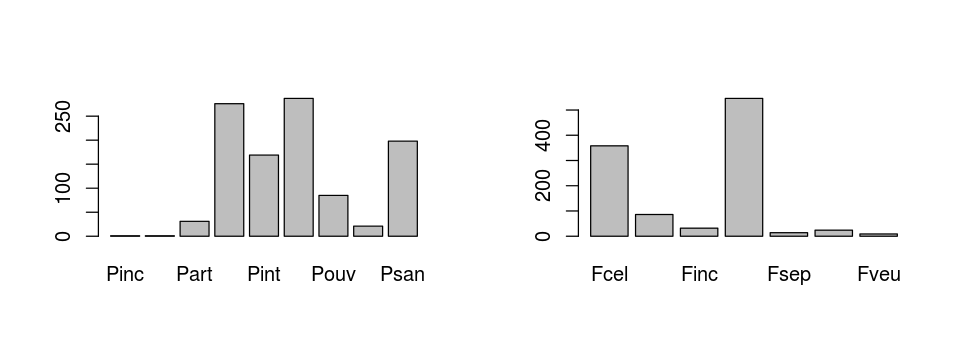

In [116]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
barplot(table(visprem[,"PCSPQ"]))
barplot(table(visprem[,"FAMIQ"]))

In [117]:
levels(visprem[,"PCSPQ"]) = c("Pint","Pint","Pcad","Pint","Pemp","Pouv","Psan","Psan","Psan")
levels(visprem[,"PCSPQ"])

[1] "Pint" "Pcad" "Pemp" "Pouv" "Psan"

In [118]:
levels(visprem[,"FAMIQ"]) = c("Fseu","Fseu","Finc","Fcou","Fseu","Fcou","Fseu")
levels(visprem[,"FAMIQ"])

[1] "Fseu" "Finc" "Fcou"

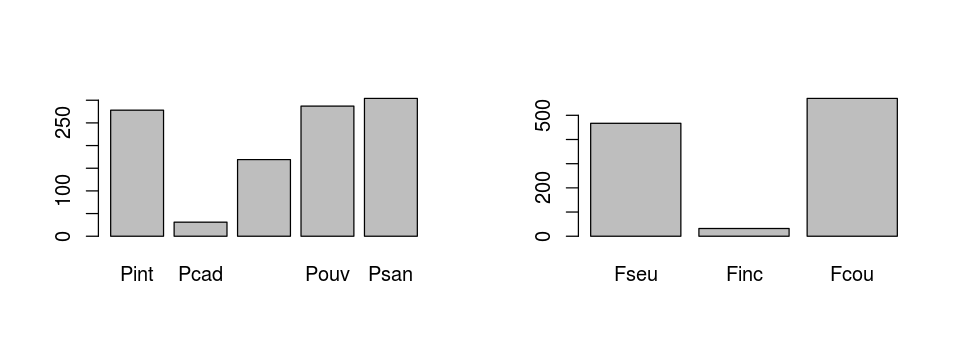

In [119]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
barplot(table(visprem[,"PCSPQ"]))
barplot(table(visprem[,"FAMIQ"]))

**Q** Quel problème révèle la distribution ci-dessous de la variable  « ancienneté dans la banque », exprimée en mois?

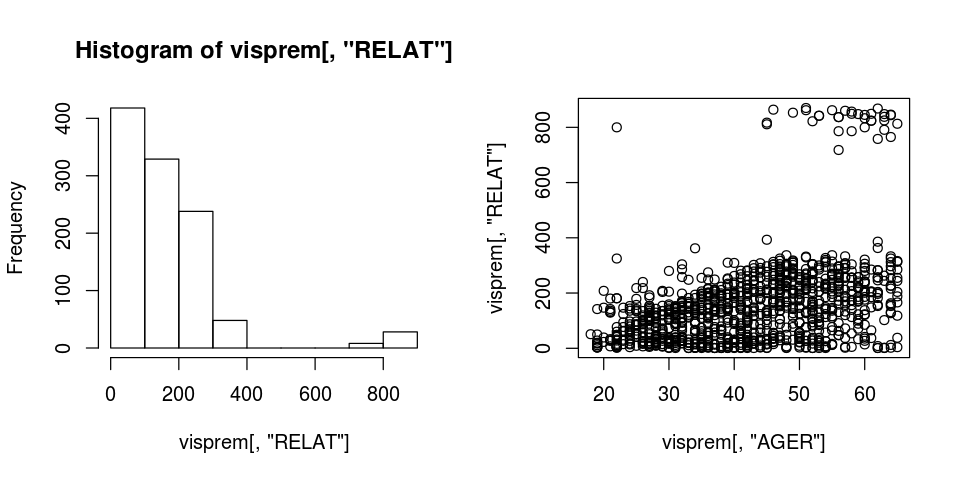

In [120]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=4)
hist(visprem[,"RELAT"])
plot(visprem[,"AGER"],visprem[,"RELAT"])

In [121]:
visprem[visprem$RELAT>600,"RELAT"]<-visprem[visprem$RELAT>600,"RELAT"]-720

**Q** Quelle transformation est opérée pour résoudre ce problème? A quoi pourrait-il être dû?

La variable `ROCNB` présente encore de nombreuses valeurs manquantes. 

**Q** Que signifie le tableau ci-dessous. Quelle correction suggère-t-il.

In [122]:
table(is.na(visprem[,"ROCNB"]),visprem[,"NTCAS"])

       
          0   1   2   3   4   5
  FALSE   0 518 209  52  11   1
  TRUE  278   0   0   0   0   0

In [123]:
visprem[is.na(visprem[,"ROCNB"]),"ROCNB"]=0

**Q** Que dire de la distribution de la variable ci-dessous? Quelle transformaiton proposer pour toutes celles de ce type?

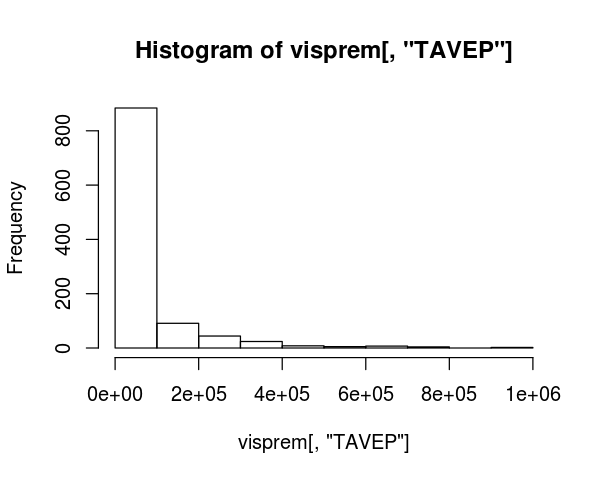

In [124]:
options(repr.plot.width=5, repr.plot.height=4)
hist(visprem[,"TAVEP"])

In [125]:
visprem = transform(visprem,OPGNBL=log(1+OPGNB))
visprem = transform(visprem,MOYRVL=log(1+MOYRV))
visprem = transform(visprem,TAVEPL=log(1+TAVEP))
visprem = transform(visprem,ENDETL=log(1+ENDET))
visprem = transform(visprem,GAGETL=log(1+GAGET))
visprem = transform(visprem,GAGECL=log(1+GAGEC))
visprem = transform(visprem,GAGEML=log(1+GAGEM))
visprem = transform(visprem,QCREDL=log(1+QCRED))
visprem = transform(visprem,DMVTPL=log(1+DMVTP))
visprem = transform(visprem,BOPPNL=log(1+BOPPN))
visprem = transform(visprem,FACANL=log(1+FACAN))
visprem = transform(visprem,LGAGTL=log(1+LGAGT))
visprem = transform(visprem,VIEMTL=log(1+VIEMT))
visprem = transform(visprem,XLGMTL=log(1+XLGMT))
visprem = transform(visprem,YLVMTL=log(1+YLVMT))
visprem = transform(visprem,ITAVCL=log(1+ITAVC))
visprem = transform(visprem,HAVEFL=log(1+HAVEF))
visprem = transform(visprem,JNBJDL=log(1+JNBJD))

**Q** Quel problème révèle le tableau ci-dessous? Comment le régler?

In [126]:
table(visprem[,"NTCAS"],visprem[,"CARVP"])

   
    Coui Cnon
  0   17  261
  1  143  375
  2  144   65
  3   42   10
  4   10    1
  5    1    0

Suppression des dernières valeurs manquantes et des variables inutiles car constantes.

In [127]:
visprem = visprem[!is.na(visprem[,"DMVTP"]),]

In [128]:
var = c("SEXEQ","FAMIQ","PCSPQ",
 "RELAT","AGER","OPGNBL","MOYRVL","TAVEPL","ENDETL","GAGETL",
 "GAGECL","GAGEML","KVUNB","QSMOY","QCREDL","DMVTPL","BOPPNL",
 "FACANL","LGAGTL","VIENB","VIEMTL","UEMNB","XLGNB",
 "XLGMTL","YLVNB","YLVMTL","ROCNB","NPTAG","ITAVCL",
 "HAVEFL","JNBJDL","CARVP")
vispremt = visprem[,var]
summary(vispremt)

  SEXEQ      FAMIQ      PCSPQ         RELAT            AGER      
 Shom:661   Fseu:465   Pint:277   Min.   : -2.0   Min.   :18.00  
 Sfem:402   Finc: 32   Pcad: 31   1st Qu.: 42.5   1st Qu.:33.00  
            Fcou:566   Pemp:167   Median :130.0   Median :43.00  
                       Pouv:287   Mean   :132.6   Mean   :42.57  
                       Psan:301   3rd Qu.:204.5   3rd Qu.:52.00  
                                  Max.   :393.0   Max.   :65.00  
     OPGNBL           MOYRVL          TAVEPL           ENDETL      
 Min.   :0.0000   Min.   :0.000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.386   1st Qu.: 0.000   1st Qu.:0.0000  
 Median :0.6931   Median :2.565   Median : 8.652   Median :0.0000  
 Mean   :0.6272   Mean   :2.371   Mean   : 6.715   Mean   :0.8279  
 3rd Qu.:1.0986   3rd Qu.:3.350   3rd Qu.:10.962   3rd Qu.:1.9459  
 Max.   :3.3673   Max.   :7.451   Max.   :13.785   Max.   :4.6052  
     GAGETL           GAGECL           GAGEML           KVUNB 

La moyenne des soldes moyens sur trois mois `QSMOY` pose toujours un problème:

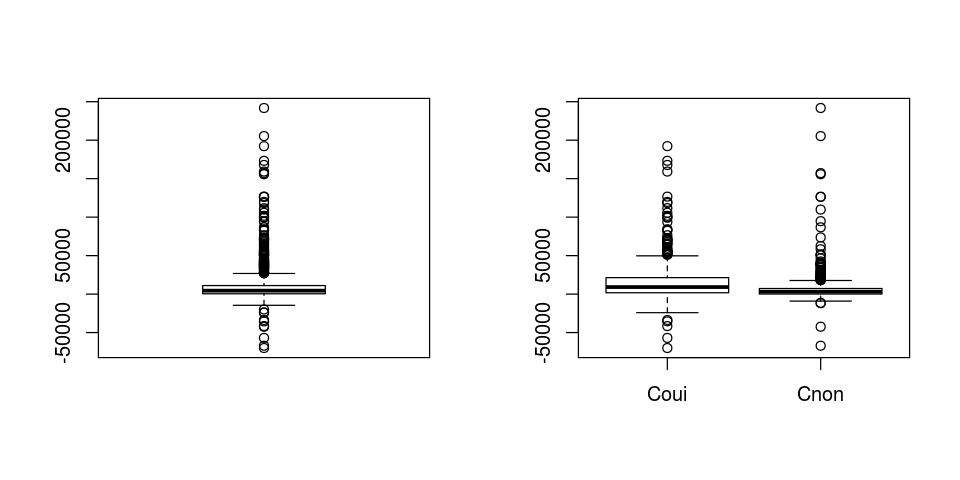

In [129]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=4)
boxplot(vispremt$QSMOY)
boxplot(vispremt$QSMOY~vispremt$CARVP)

mais elle semble peu discriminante, elle est conservée en l'état. Sinon une transformation par la fonction "argument sinus hyperbolique" peut être utilisée avec ce type de distribution mais ce n'est pas indispensable.

**Q** Que représente le graphique ci-dessous? Interprétation en quelques lignes. Ces variables semblent-elles liées ? 

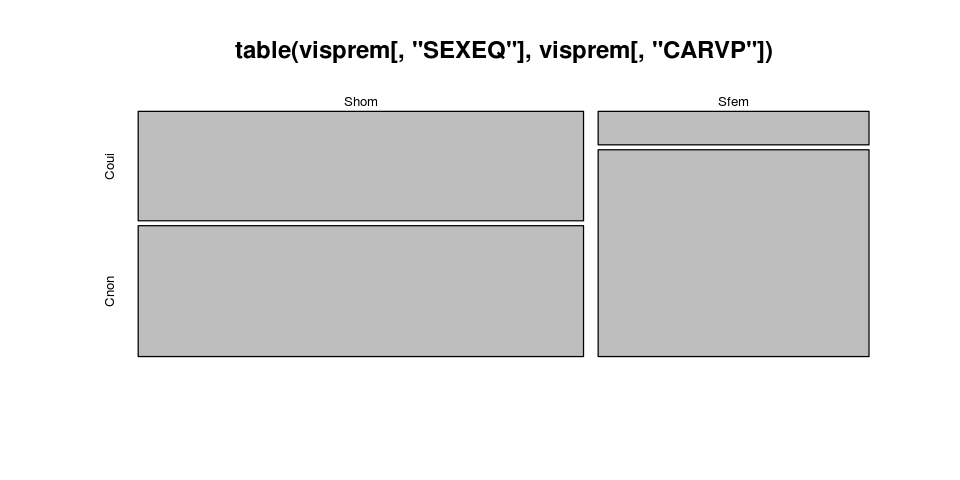

In [130]:
mosaicplot(table(visprem[,"SEXEQ"],visprem[,"CARVP"]))

**Q** Comment interpréter le graphe ci-dessous?

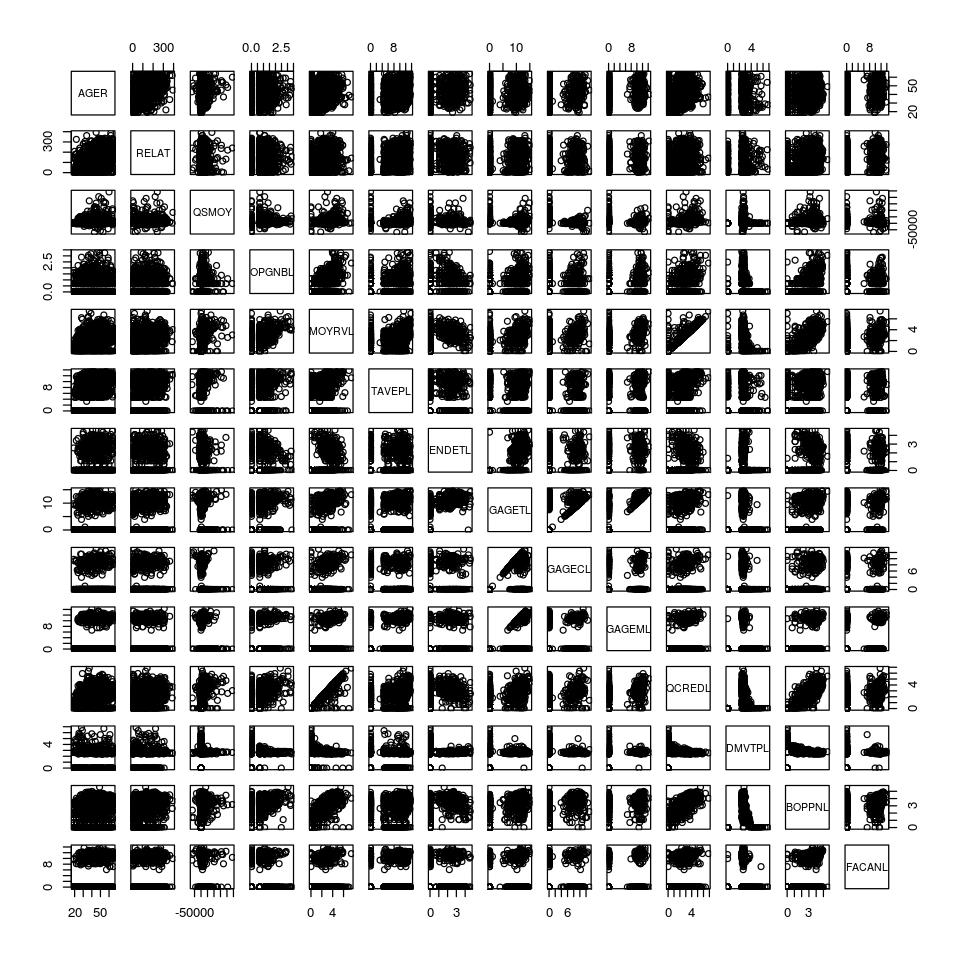

In [131]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(vispremt[,c("AGER","RELAT","QSMOY", "OPGNBL", "MOYRVL","TAVEPL", "ENDETL", "GAGETL","GAGECL",
                  "GAGEML", "QCREDL", "DMVTPL","BOPPNL","FACANL")])

# <FONT COLOR="Red">Épisode 2 ACP</font>

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
Cette phase de l'analyse permet de mieux comprendre la structure de corrélation des variables afin de d'appréhender ce que seront les grandes classes de comportement des clients.
### 3.1 Avec la fonction `princomp` de R
#### Dimension

**Q** L'ACP calculée ci-dessous est-elle réduite ? Pourquoi?

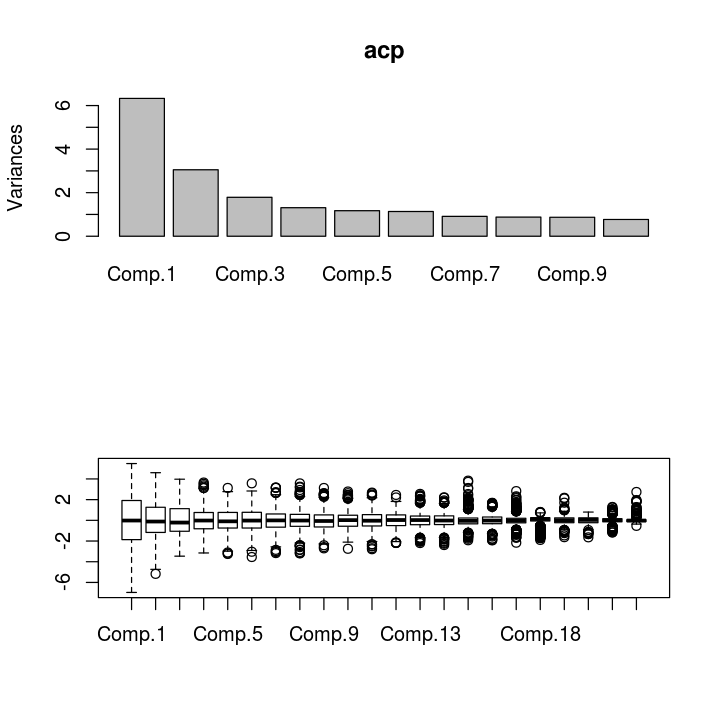

In [132]:
# Sélection des variables quantitatives
dat=vispremt[,c("AGER","RELAT","KVUNB", "OPGNBL", "MOYRVL","TAVEPL","ENDETL","GAGETL","GAGECL",
               "GAGEML","QCREDL","DMVTPL","BOPPNL","FACANL","LGAGTL","VIEMTL","XLGMTL","YLVMTL",
               "ITAVCL","HAVEFL","JNBJDL","ROCNB")]
acp=princomp(dat,cor=TRUE)
# Décroissance des valeurs propres
par(mfrow = c(2,1))
options(repr.plot.width=6, repr.plot.height=6)
plot(acp)
boxplot(data.frame(acp$scores))

#### Individus
**Q** Que représente les graphes ci-dessus? Quelle information en tirer?

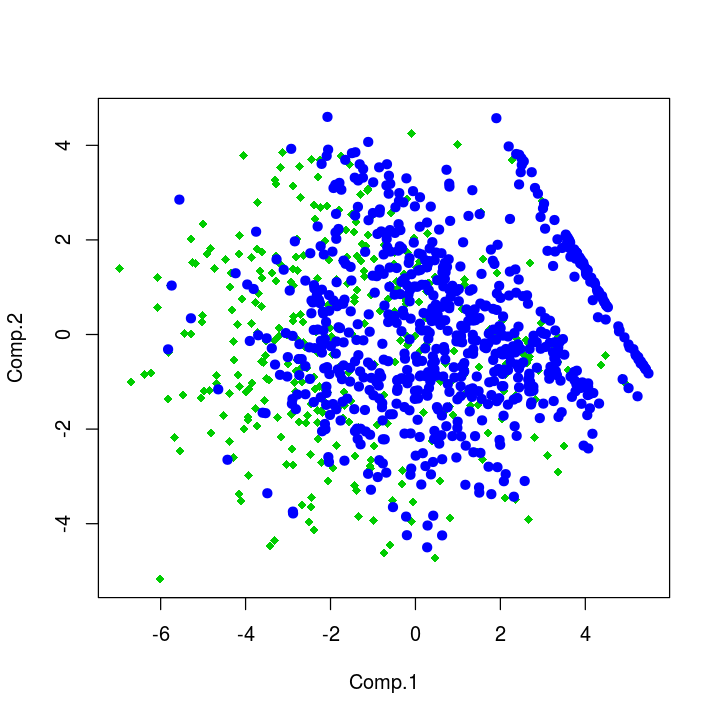

In [133]:
coul=as.integer(vispremt[,"CARVP"])+2
options(repr.plot.width=6, repr.plot.height=6)
plot(acp$scores,col=coul, pch=17+coul-2)

**Q** Quel est le graphe ci-dessus? Quelle information en retenir?

#### Variables
**Q** Que représent le graphe ci-dessous? Donner en une ligne une interprétation de l'axe 1 puis de l'axe2.

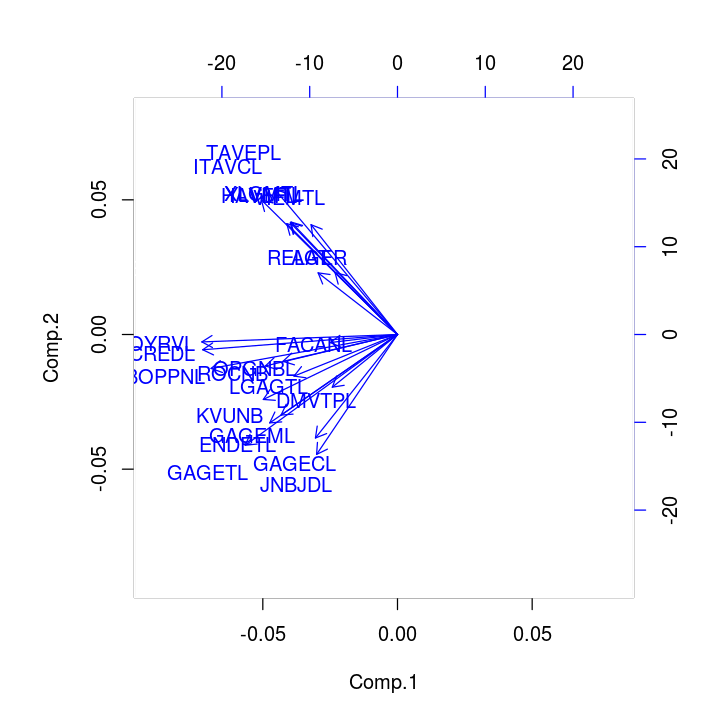

In [134]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(acp,col=c("white","blue"))

### 3.2 Avec `FactomineR`
Le package `FactoMineR` offre de nombreuses facilités pour les représentations graphiques.
#### Dimension

**Q** L'ACP est-relle réduite? Comment interpréter les résultats ci-dessous?

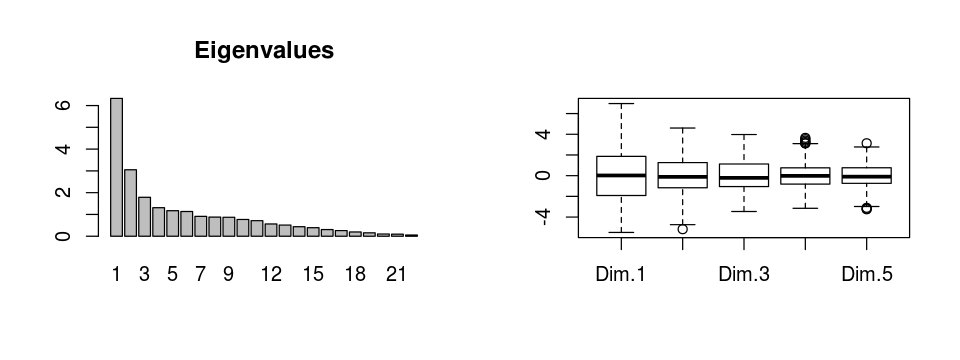

In [135]:
library(FactoMineR)
res.pca=PCA(dat,scale.unit = TRUE, graph=F)
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
barplot(res.pca$eig[,1],main="Eigenvalues",names.arg=1:nrow(res.pca$eig))
boxplot(res.pca$ind$coord)

#### Variables et cercle des corrélations

**Q** Qu'est-ce que le cercle des corrélations, à quoi sert-il?

**Q** La représentation ci-dessous est-elle différente de celle obtenue par `princomp`? Pourquoi?

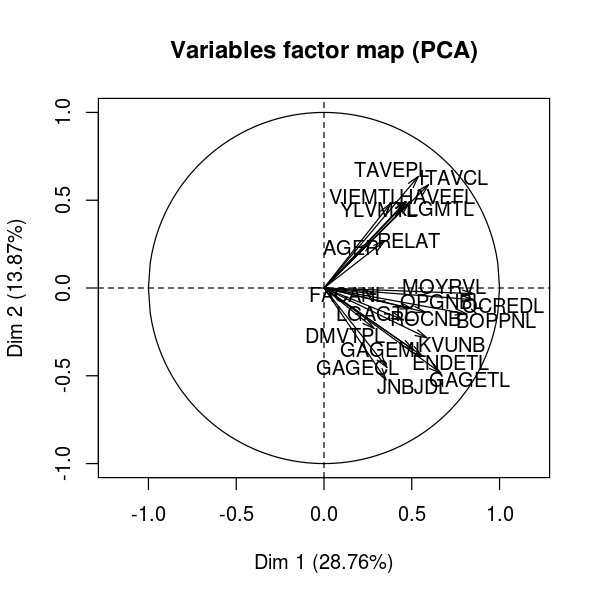

In [136]:
options(repr.plot.width=5, repr.plot.height=5)
plot(res.pca,choix="var")

**Attention** à ce niveau de l'étude, il est intéressant de produire une classification non supervisée des variables afin de simplifier et compléer l'interprétation. C'est très utile lorsque, comme dans le cas présent, le nombre de variables est important. Cette étape st reportée dans l'épisode 5 pour respecter le déroulement de cette saison.

Pas d'**épisode 3**, l'analyse factorielle discirminante n'est pas adaptée à ces données.
# <FONT COLOR="Red">Épisode 4 AFCM</font>

## 4 [Analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf) 

### 4.1 Recodage des variables
Afin d'intégrer toutes les variables et pas seulement celles quantitatives, un recodage de ces dernières variables, permet de toutes les intégrer dans une analyse multiple des correspondances. 

**Remarques**
- Le nombre de classes doit être relativement restreint pour limiter les dimensions et faciliter les interprétations, 
- il est préférable de choisir, pour des variables distribuées "normalement", des classes d'effectifs égaux: les bornes sont des quantiles.
- Dans le cas des données bancaires, les variables présentant une distribution très asymétrique se résument souvent en une variable dichotomique: présence ou absence d'un produit financier donné. Dans ce dernier cas, il est inutile de conserver à la fois une variable "nombre" et une variable "montant" du même produit financier.

**Q** La variable `FAMIQ`présente quelques données manquantes. Expliquer la stratégie utilisée ci-dessous pour imputer les valeurs manquantes.

In [137]:
vispremv=vispremt
inc=row.names(subset(vispremt,vispremt$FAMIQ=="Finc"))
unif=runif(length(inc))<0.45
vispremt[inc,"FAMIQ"]<-factor(unif,levels=c("TRUE","FALSE"),labels=c("Fseu","Fcou"))
famiq<-as.vector(vispremt[,"FAMIQ"])    # Pour aléatoirement le niveau "Finc"
vispremt[,"FAMIQ"]<-factor(famiq)
vispremv<-vispremt

**Q** Expliciter la stratégie utilisée pour le découpage des variables quantitatives ci-dessous:

In [138]:
vispremv[,"kvunbq"]<-cut(vispremv$KVUNB,
                         breaks=c(min(vispremv$KVUNB),1.5,max(vispremv$KVUNB)),
                         labels = c("K0","K1"),include.lowest = TRUE)
vispremv[,"vienbq"]<-cut(vispremv$VIENB,
                         breaks=c(min(vispremv$VIENB),0.5,max(vispremv$VIENB)),
                         labels = c("V0","V1"),include.lowest = TRUE)
vispremv[,"uemnbq"]<-cut(vispremv$UEMNB,
                         breaks=c(min(vispremv$UEMNB),0.5,1.5,max(vispremv$UEMNB)),
                         labels = c("U0","U1","U2"),include.lowest = TRUE)
vispremv[,"xlgnbq"]<-cut(vispremv$XLGNB,
                         breaks=c(min(vispremv$XLGNB),0.5,1.5,max(vispremv$XLGNB)),
                         labels = c("X0","X1","X2"),include.lowest = TRUE)
vispremv[,"ylvnbq"]<-cut(vispremv$YLVNB,
                         breaks=c(min(vispremv$YLVNB),0.5,1.5,max(vispremv$YLVNB)),
                         labels = c("Y0","Y1","Y2"),include.lowest = TRUE)
vispremv[,"rocnbq"]<-cut(vispremv$ROCNB,
                         breaks=c(min(vispremv$ROCNB),0.5,max(vispremv$ROCNB)),
                         labels = c("R0","R1"),include.lowest = TRUE)
vispremv[,"nptagq"]<-cut(vispremv$NPTAG,
                         breaks=c(min(vispremv$NPTAG),0.5,max(vispremv$NPTAG)),
                         labels = c("N0","N1"),include.lowest = TRUE)
vispremv[,"endetq"]<-cut(ceiling(vispremv$ENDETL),
                         breaks=c(min(ceiling(vispremv$ENDETL)),0.5,max(ceiling(vispremv$ENDETL))),
                         labels = c("E0","E1"),include.lowest = TRUE)
vispremv[,"gagetq"]<-cut(ceiling(vispremv$GAGETL),
                         breaks=c(min(ceiling(vispremv$GAGETL)),0.5,max(ceiling(vispremv$GAGETL))),
                         labels = c("G0","G1"),include.lowest = TRUE)
vispremv[,"facanq"]<-cut(ceiling(vispremv$FACANL), 
                         breaks=c(min(ceiling(vispremv$FACANL)),0.5,max(ceiling(vispremv$FACANL))), 
                         labels = c("F0","F1"),include.lowest = TRUE)
vispremv[,"lgagtq"]<-cut(ceiling(vispremv$LGAGTL), 
                         breaks=c(min(ceiling(vispremv$LGAGTL)),0.5,max(ceiling(vispremv$LGAGTL))), 
                         labels = c("L0","L1"),include.lowest = TRUE)
vispremv[,"havefq"]<-cut(ceiling(vispremv$HAVEFL), 
                         breaks=c(min(ceiling(vispremv$HAVEFL)),0.5,max(ceiling(vispremv$HAVEFL))), 
                         labels = c("H0","H1"),include.lowest = TRUE)
vispremv[,"jnbjdq"]<-cut(vispremv$JNBJDL,
                         breaks=c(0,0.0001,2.8,5),
                         labels = c("J0","J1","J2"),include.lowest = TRUE)

**Q** Expliciter la stratégie utilisée pour le découpage des variables quantitatives ci-dessous:

In [139]:
vispremv[,"ageq"]<-cut(vispremv$AGER,
                       breaks=quantile(vispremv[,"AGER"], probs = seq(0, 1, 1/3)),
                       labels = c("A0","A1","A2"),include.lowest = TRUE)
vispremv[,"relatq"]<-cut(vispremv$RELAT,
                         breaks=quantile(vispremv[,"RELAT"], probs = seq(0, 1, 1/3)),
                         labels = c("R0","R1","R2"),include.lowest = TRUE)
vispremv[,"qsmoyq"]<-cut(vispremv$QSMOY,
                         breaks=quantile(vispremv[,"QSMOY"], probs = seq(0, 1, 1/3)),
                         labels = c("Q0","Q1","Q2"),include.lowest = TRUE)
vispremv[,"opgnbq"]<-cut(vispremv$OPGNBL,
                         breaks=c(0,0.0000001,0.7,3.367296),
                         labels = c("O0","O1","O2"),include.lowest = TRUE)
vispremv[,"moyrvq"]<-cut(vispremv$MOYRVL,
                         breaks=quantile(vispremv[,"MOYRVL"], probs = seq(0, 1, 1/3)),
                         labels = c("M0","M1","M2"),include.lowest = TRUE)
vispremv[,"tavepq"]<-cut(vispremv$TAVEPL,
                         breaks=quantile(vispremv[,"TAVEPL"], probs = seq(0, 1, 1/3)),
                         labels = c("T0","T1","T2"),include.lowest = TRUE)
vispremv[,"dmvtpq"]<-cut(vispremv$DMVTPL,
                         breaks=quantile(vispremv[,"DMVTPL"], probs = seq(0, 1, 1/3)),
                         labels = c("D0","D1","D2"),include.lowest = TRUE)
vispremv[,"boppnq"]<-cut(vispremv$BOPPNL,
                         breaks=quantile(vispremv[,"BOPPNL"], probs = seq(0, 1, 1/3)),
                         labels = c("B0","B1","B2"),include.lowest = TRUE)
vispremv[,"itavcq"]<-cut(vispremv$ITAVCL,
                         breaks=quantile(vispremv[,"ITAVCL"], probs = seq(0, 1, 1/3)),
                         labels = c("I0","I1","I2"),include.lowest = TRUE)

Les variables sont réordonnées de façon à faire lister dans vispremv: 
- les variables qualitatives initiales et obtenues par recodage, 
- celles quantitatives
- `CARVP`

In [140]:
var<-c(names(vispremv)[1:3],names(vispremv)[33:54],names(vispremv)[4:31],names(vispremv)[32])   
vispremv<-vispremv[,var]
summary(vispremv)

  SEXEQ      FAMIQ      PCSPQ     kvunbq   vienbq   uemnbq   xlgnbq   ylvnbq  
 Shom:661   Fcou:580   Pint:277   K0:946   V0:888   U0:279   X0:573   Y0:463  
 Sfem:402   Fseu:483   Pcad: 31   K1:117   V1:175   U1:336   X1:302   Y1:410  
                       Pemp:167                     U2:448   X2:188   Y2:190  
                       Pouv:287                                               
                       Psan:301                                               
                                                                              
 rocnbq   nptagq   endetq   gagetq   facanq   lgagtq   havefq   jnbjdq  
 R0:484   N0:929   E0:714   G0:622   F0:781   L0:922   H0:720   J0:613  
 R1:579   N1:134   E1:349   G1:441   F1:282   L1:141   H1:343   J1:224  
                                                                J2:226  
                                                                        
                                                                        
         

### 4.2 AFCM élémentaire
Il est classique de rechercher une première AFCM n'utilisant que les variables résumant les caractéristiques sociales (signalétique) des clients en variables principales afin de détecter d'éventuelles incohérences. Les variables bancaires sont projetées en tant que variables supplémentaires. 

**Q** Que signifient les valeurs propres si-dessous?

In [141]:
afc=MCA(vispremv[, c(1:25,54)],quali.sup=c(4:16,19:26))
summary(afc)


Call:
MCA(X = vispremv[, c(1:25, 54)], quali.sup = c(4:16, 19:26)) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.367   0.257   0.222   0.203   0.197   0.190   0.163
% of var.             18.353  12.849  11.076  10.146   9.847   9.500   8.135
Cumulative % of var.  18.353  31.202  42.279  52.425  62.272  71.772  79.907
                       Dim.8   Dim.9  Dim.10
Variance               0.156   0.145   0.101
% of var.              7.782   7.246   5.065
Cumulative % of var.  87.690  94.935 100.000

Individuals (the 10 first)
           Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr   cos2  
148009  |  0.925  0.219  0.510 | -0.273  0.027  0.045 | -0.429  0.078  0.109 |
552427  |  0.565  0.082  0.190 | -0.336  0.041  0.067 | -0.584  0.145  0.203 |
556005  | -0.883  0.200  0.470 |  0.070  0.002  0.003 | -0.585  0.145  0.206 |
556686  | -0.181  0.008  0.019 |  0.098  0.004  0.006 |  0.710  0.214  0.296 |
642680

**Q** Commenter le graphique ci-dessous. Présente-t-il des incohérences particulières ?

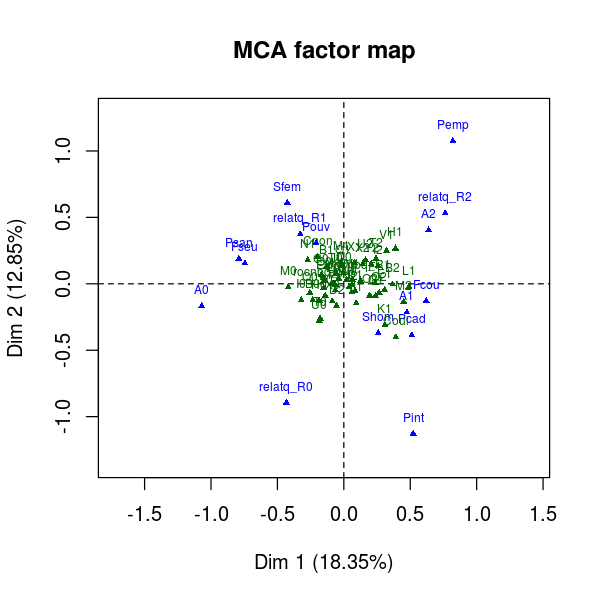

In [142]:
options(repr.plot.width=5, repr.plot.height=5)
plot.MCA(afc,invisible=c("ind"),col.var="blue",cex=0.6)

###  4.3 AFCM de toutes les variables qualitatives
L'objectif de cette exploration est de construire la représentation la plus explicite pour bien appréhender les structures des données. 

**Q** Remarquant que la plupart des modalités "0" se trouvent à gauche du graphique suivant, quelle interprétation donner du premier axe? 

*Rappel*: le premier caractère de chaque libellé de modalité identifie la variable.

**Q** Identifier quelques variables et modalités caractéristiques et donnez une interprétation du 2ème axe.

**Q** Qu’est-ce qui caractérise principalement les porteurs de la carte visa premier (variable CARVP) ?

In [87]:
afc=MCA(vispremv[, c(1:25,54)],quali.sup=c(26))

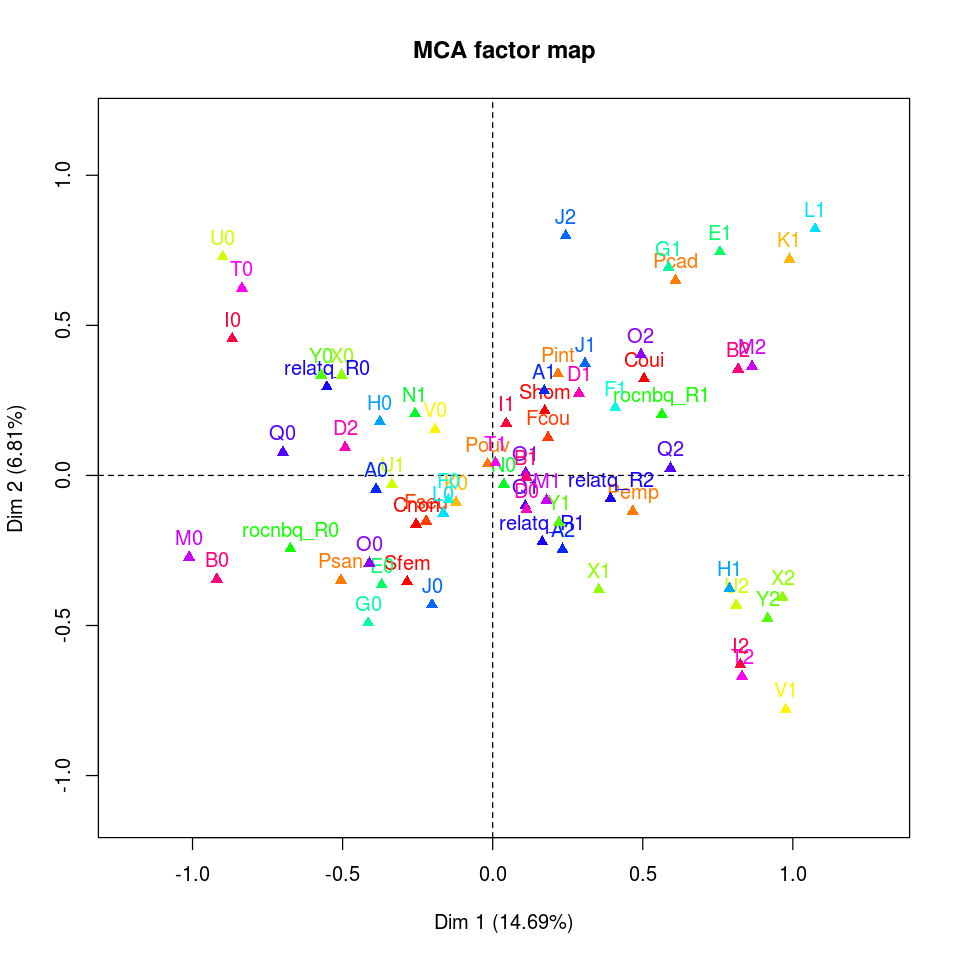

In [88]:
options(repr.plot.width=8, repr.plot.height=8)
plot.MCA(afc,invisible=c("ind"),habillage="quali",palette=palette(rainbow(25)))

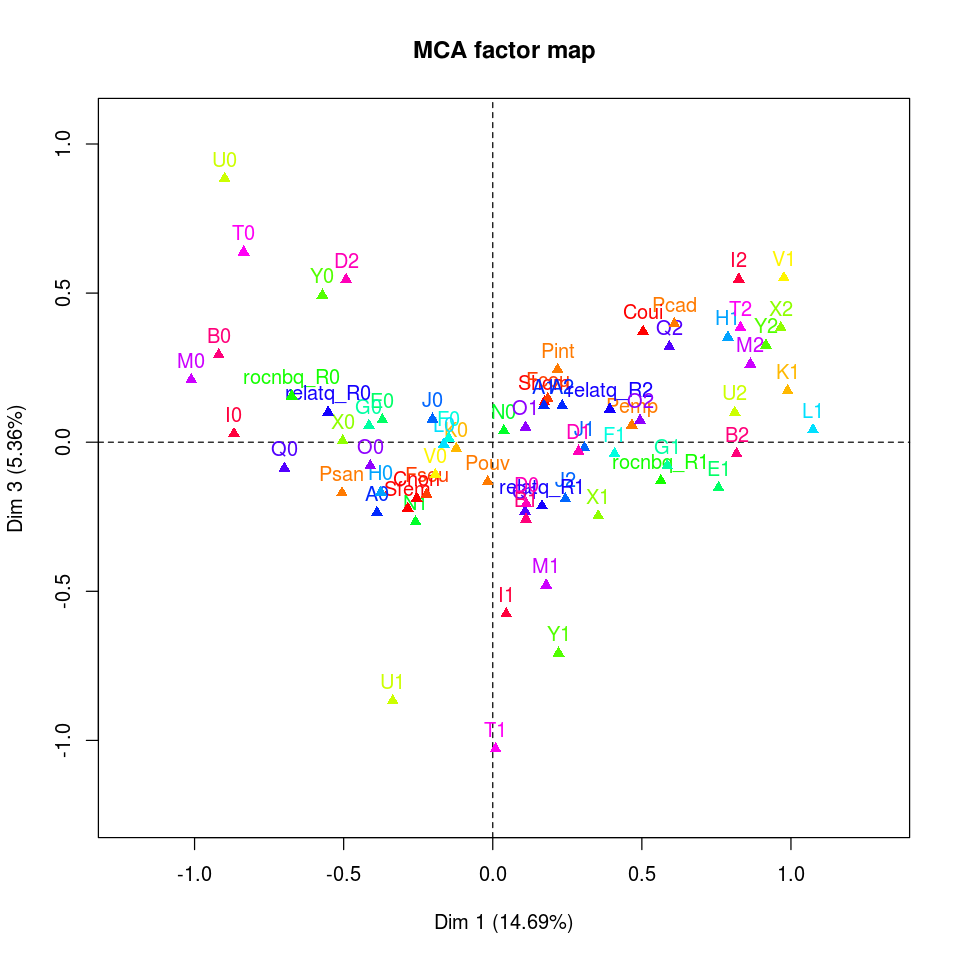

In [89]:
plot.MCA(afc,axes=c(1,3),invisible=c("ind"),habillage="quali",palette=palette(rainbow(25)))

**Q** Le graphe ci-dessous représente également les clients dans le plan (1,2). L’AFC de quelle matrice a été calculée pour aboutir à ce résultat ? 

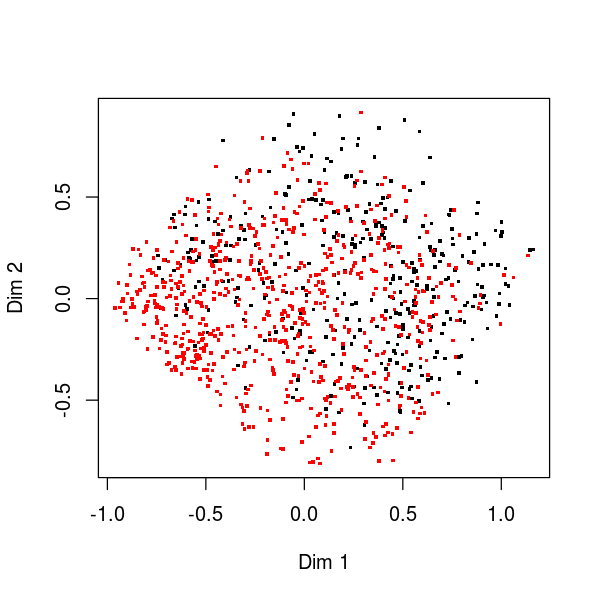

In [90]:
options(repr.plot.width=5, repr.plot.height=5)
palette("default")
plot(afc$ind$coord,type="p",pch=".",cex=3,col=as.integer(vispremv[,54]))

# <FONT COLOR="Red">Épisode 5 Classification non supervisée</font>

### 3.3 Classification des variables
***N.B.*** Cette section dépend de l'épisode 3 pour aider à l'interprétation de l'ACP.

Les interprétations sont difficiles, notamment à cause du nombre de variables. Une classification de celles-ci peut aider à l'interprétation.
#### [Classification ascendante hiérarchique](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
**Q** Quelles est, ci-dessous, la distance calculée entre les "variables"? Est-elle euclidienne? Quelle autre distance aurait pu être utilisée?

In [91]:
dist.var<-as.dist(1-cor(dat)**2)

**Q** Quelle est la méthode utilisée ci-dessous et avec quelle option? Quelles autres options sont disponibles?

In [92]:
clas.var<-hclust(dist.var,method="ward.D")

**Q** Comment choisir le nombre de classes? Jusifier.

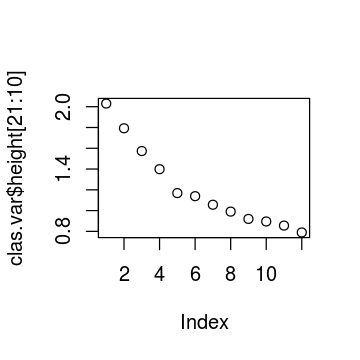

In [93]:
options(repr.plot.width=3, repr.plot.height=3)
plot(clas.var$height[21:10])

**Q** Comment sont mesurées les distances entre sous-groupes de variables? 

**Q** Quel est le graphique ci-dessous. Considérer trois classes. Comment interpréter ces regroupements? Quel lien avec les axes de l'ACP?

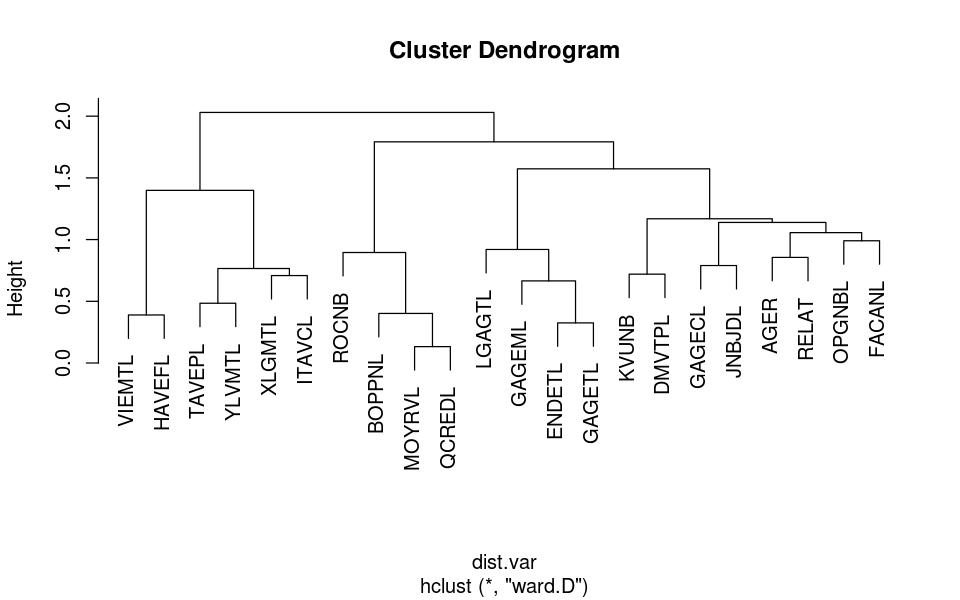

In [94]:
options(repr.plot.width=8, repr.plot.height=5)
plot(clas.var)

## 5 Segmentation ou *clustering* des clients
L'objectif principal, lors de cette première étude des données, est de fournir une typologie ou segmentation des clients. C'est-à-dire de définir des classes les plus homogènes au regard des comportements bancaires. Les algorithmes de classification étudiés sont adaptés à des variables {*quantitatives* ou des matrices de distances. L'intégration d'informations qualitatives peut se faire par un recodage préalable (scoring) à l'aide d'une analyse des correspondances multiples. Ce scénatio se propose donc de comparer deux approches: classification à partir des seules variables quantitatives ou classification à partir des scores issues d'une afcm. D'autres approches sont envisageables sur des variables qualitatives qui nécessitent la définition d'une distance ou dissimilarité entre individus adaptée aux variables qualitatives. Mais, nécessitant la construction de la matrice *n x n* des distances des individus deux à deux, elles ne sont pas adaptées aux très grands tableaux.

### 5.1 Sur les seules variables quantitatives
A titre d'exemple, voici comment obtenir une typologie à partir des seules variables quantitatives. 

**Q** Quel problème peut poser la CAH (classification ascendante hiérérchique)) pour de très gros fichiers? 

**Q** En revanche, quel est l'avantage de la CAH sur les algortihmes par réallocation dynamique de type $k-means$?

**Q** Quelle stratégie peut être employée pour contourner le problème de *n* grand?

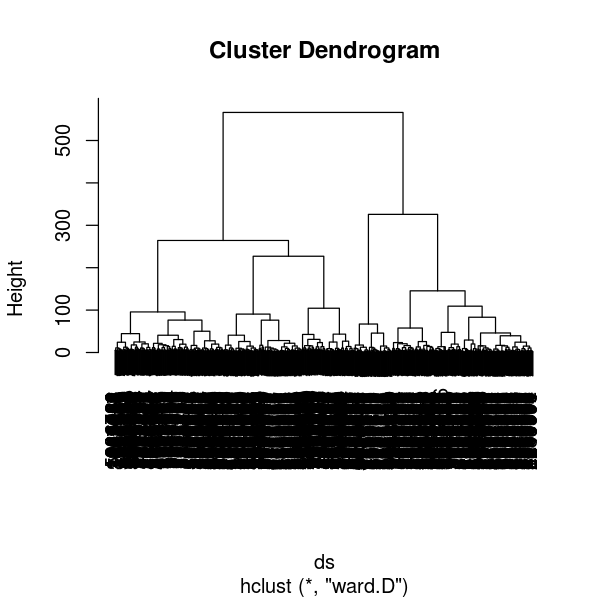

In [95]:
dat=vispremv[,c(26:54)]
ds=dist(scale(dat[,-29]))
options(repr.plot.width=5, repr.plot.height=5)
hc.ds = hclust(ds,method="ward.D")
plot(hc.ds)

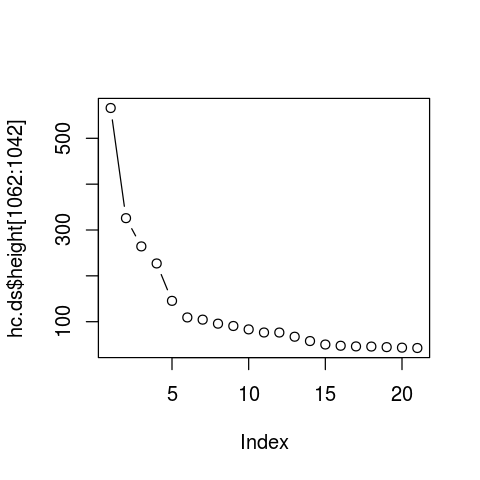

In [96]:
options(repr.plot.width=4, repr.plot.height=4)
plot(hc.ds$height[1062:1042],type="b")

**Q** Quel est le graphique ci-dessus? Quelle conclusion en tirer?

In [97]:
Classe = cutree(hc.ds,k=5)

Représentation des classes.

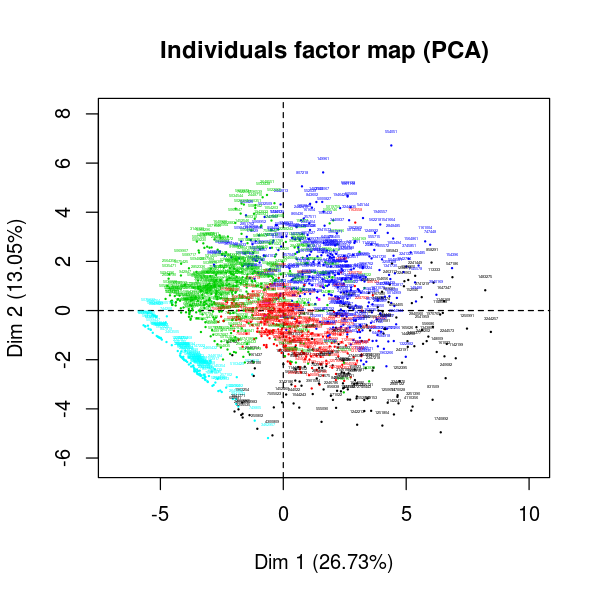

In [98]:
acp=PCA(dat,quali.sup=29,ncp=13,graph=F)
# graphe de l’acp
palette("default")
options(repr.plot.width=5, repr.plot.height=5)
plot(acp,choix="ind", habillage="ind",col.hab=Classe,cex=0.2)

Comparaison avec un autre algorithme de classificaion non supervisée.

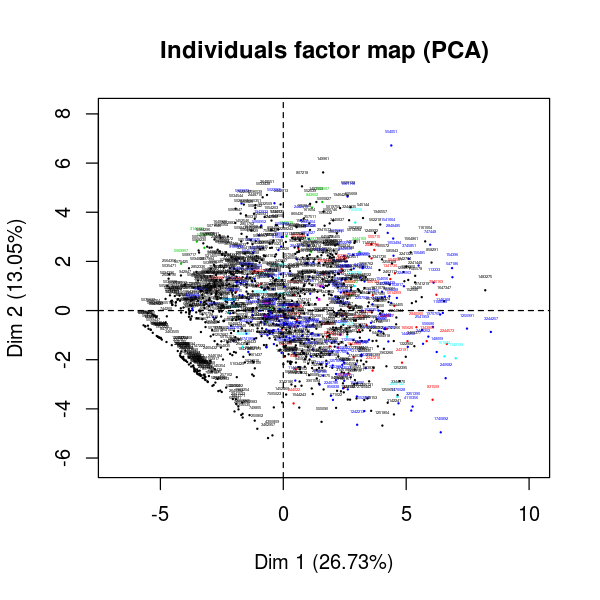

In [99]:
kocde=kmeans(dat[,-29],5)
Klasse=kocde$cluster
plot(acp,choix="ind", habillage="ind",col.hab=Klasse,cex=0.2)

In [100]:
table(Classe, Klasse)

      Klasse
Classe   1   2   3   4   5
     1  82  12   0  34   3
     2 133  14   0  44  10
     3 312   6   5  35   0
     4 212  10   5  48   0
     5  98   0   0   0   0

**Q** En tenant compte des deux représentations par ACp et du tableau ci-dessus, que dire de la qualité des classes obtenues?

### 5.2 *Clustering* sur composantes de l'AFCM
Il semble important de prendre également en compte les variables qualitatives dans cette étude.

**Q** Préciser la démarche permettant d'obtenir une typologie des clients décrits par des variables à la fois quantitatives et qualitatives.

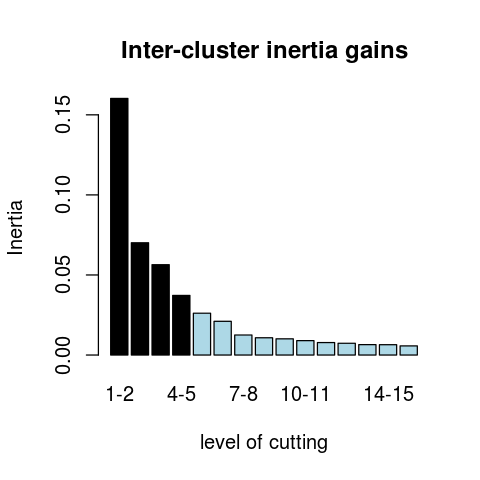

In [101]:
res.hcpc=HCPC(afc,nb.clust=5,method="ward",order=F,graph=F)
options(repr.plot.width=4, repr.plot.height=4)
plot(res.hcpc,choice="bar")

**Q** Comment choisir le nombre de classes?

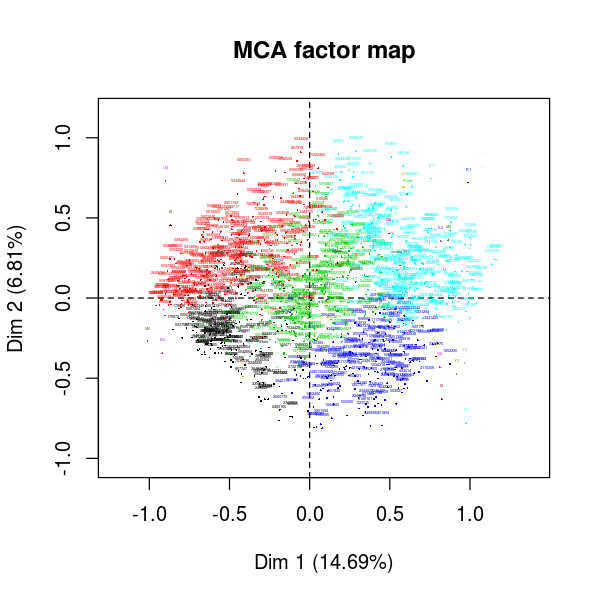

In [102]:
color=as.integer(res.hcpc$data.clust$clust)
options(repr.plot.width=5, repr.plot.height=5)
plot(afc, choix="ind",habillage="quali",col.ind=color,cex=0.2)

**Q** Justifier le choix du nombre de classes.

Les classes obtenues sont définies comme les modalités `Cl1` à `Cl5` d’une variable qualitative `Classe`. Comme pour l'ACP, la classification obtenue est comparée avec celle produite par *k-means*.

In [103]:
"Classe"=factor(res.hcpc$data.clust$clust,labels=c("Cl1","Cl2","Cl3","Cl4","Cl5"))
kocde=kmeans(afc$ind$coord,5)
Klasse=kocde$cluster
table(Classe, Klasse)

      Klasse
Classe   1   2   3   4   5
   Cl1   4   0   0   0 163
   Cl2 136   0 135   0   0
   Cl3   0 185   4   1  21
   Cl4   0   4   0 163  12
   Cl5   0  80  11 143   1

**Q** Commenter les résultats obtenus. 

Les classes sont ensuite représentées dans les composantes de l'AFCM en ajoutant la variable `Classe` en supplémentaire.

**Q** A partir du graphe ci-dessous, résumer quelques caractéristiques des classes des clients.

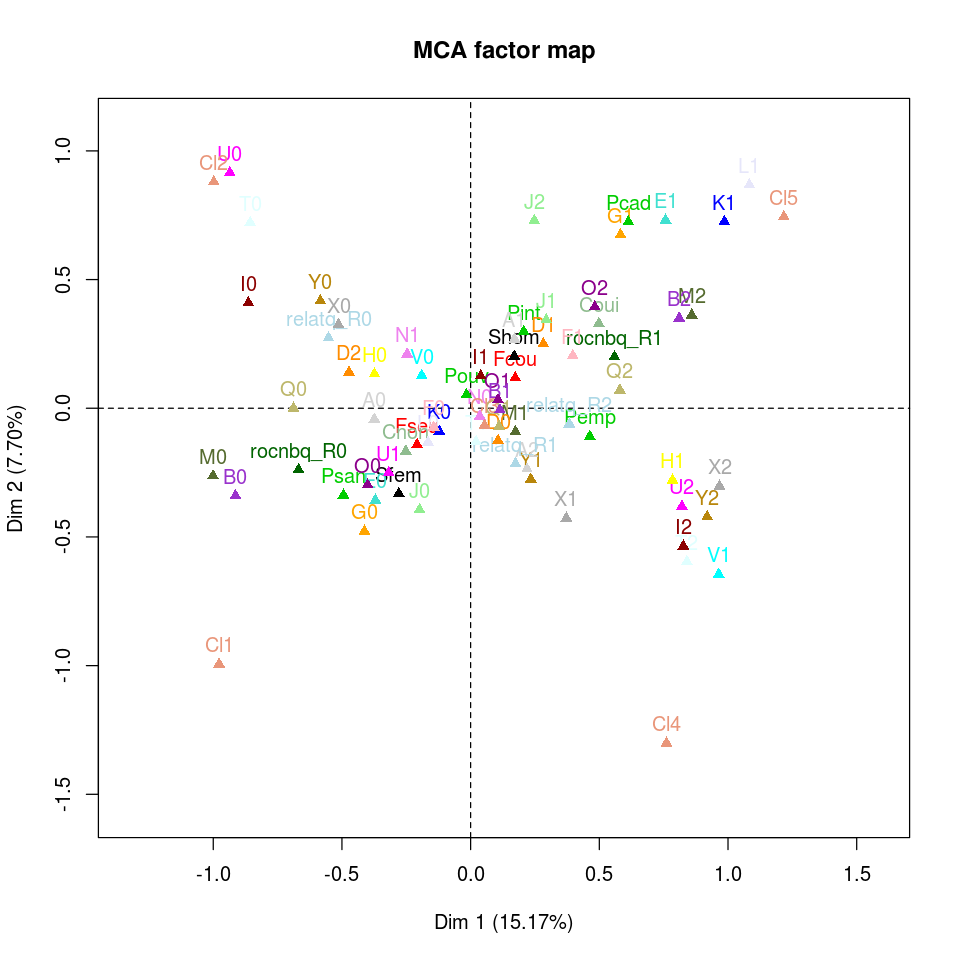

In [104]:
# AFCM avec la variable Classe
datClasse=data.frame(vispremv[, c(1:25,54)],"Classe"=Classe)
afc=MCA(datClasse,graph=F,quali.sup=c(26))
options(repr.plot.width=8, repr.plot.height=8)
plot(afc,habillage="quali",invisible="ind")

Sauvegarde des données pour aborder l'étape de modélisation ou de construction du score d'appétence.

In [105]:
write.table(vispremv,"vispremv.dat")

Pas d'**épisode 6** car la factorisation non négative de matrice n'apporterait rien.